In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Mirella Glowinska C00275764

Dataset Source: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python?select=Mall_Customers.csv

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Mall_Customers.csv')
print("First 5 rows of the dataset:")
print(df.head())
print("------------------------------------------------------------------------------")

# (rows, columns)
print(f"Shape of dataset: {df.shape}")
print("------------------------------------------------------------------------------")
print("Minimum values:")
print(df.min(numeric_only=True))
print("------------------------------------------------------------------------------")
print("\nMaximum values:")
print(df.max(numeric_only=True))
print("------------------------------------------------------------------------------")
print(df.describe())

First 5 rows of the dataset:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
------------------------------------------------------------------------------
Shape of dataset: (200, 5)
------------------------------------------------------------------------------
Minimum values:
CustomerID                 1
Age                       18
Annual Income (k$)        15
Spending Score (1-100)     1
dtype: int64
------------------------------------------------------------------------------

Maximum values:
CustomerID                200
Age                        70
Annual Income (k$)        137
Spending Score (1-100)     99

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

print("\nMissing values:")
print(df.isnull().sum())


Missing values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
Cluster                   0
dtype: int64


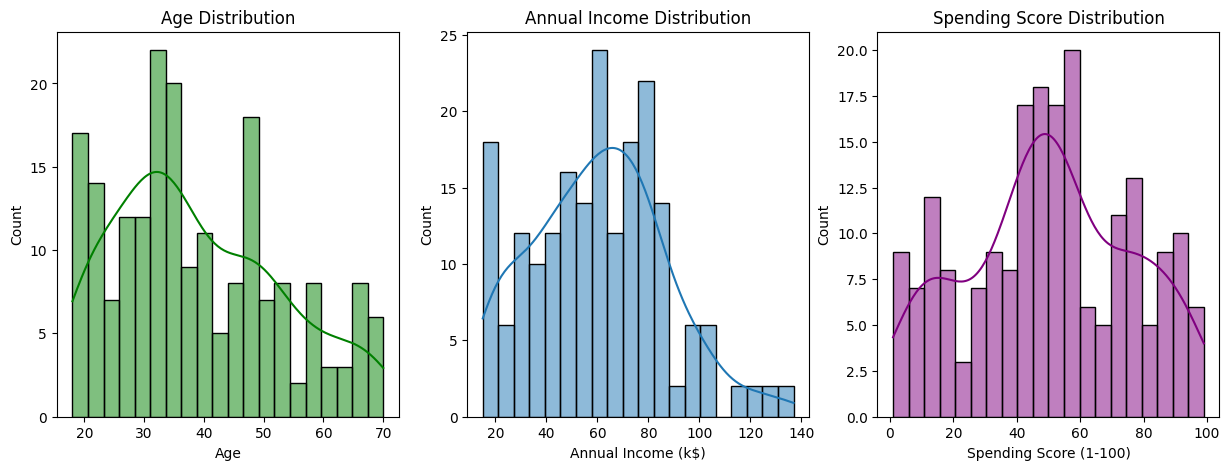

<ipython-input-24-d5f3331a8ef5>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette={'Male': 'blue', 'Female': 'pink'})


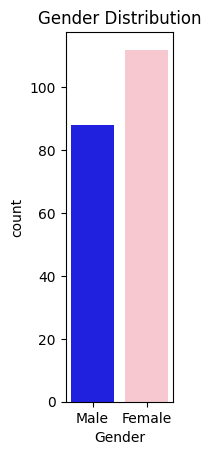

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['Age'], bins=20, kde=True, color='green')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True)
plt.title('Annual Income Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['Spending Score (1-100)'], bins=20, kde=True, color='purple')
plt.title('Spending Score Distribution')

plt.show()
plt.subplot(1, 4, 4)
sns.countplot(x='Gender', data=df, palette={'Male': 'blue', 'Female': 'pink'})
plt.title('Gender Distribution')

plt.show()

Tutorial (Elbow Metod, Silhouette Score): https://medium.com/@nirmalsankalana/k-means-clustering-choosing-optimal-k-process-and-evaluation-methods-2c69377a7ee4

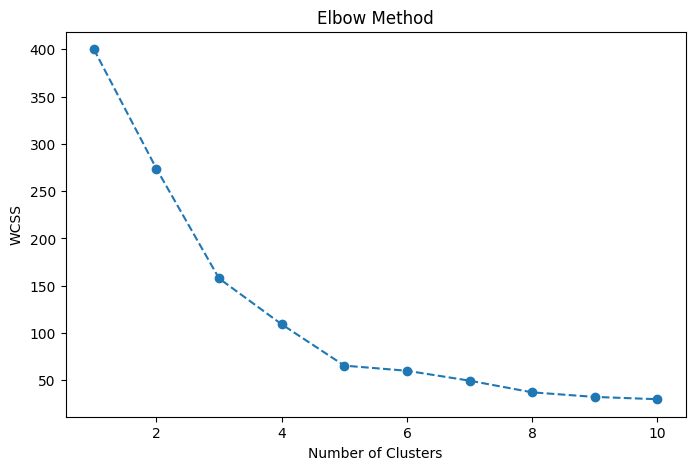

------------------------------------------------------------------------------


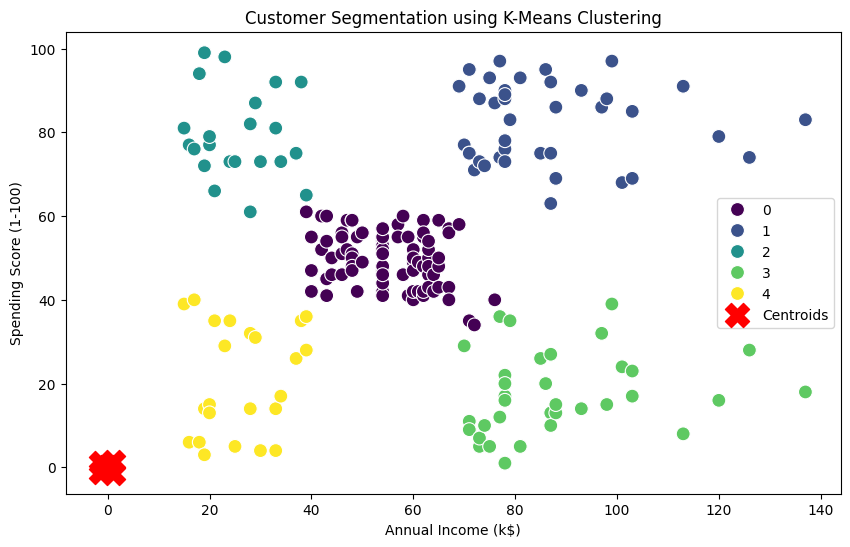


Cluster Analysis:
         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                      
0         86.320988  42.716049           55.296296               49.518519   
1        162.000000  32.692308           86.538462               82.128205   
2         23.090909  25.272727           25.727273               79.363636   
3        164.371429  41.114286           88.200000               17.114286   
4         23.000000  45.217391           26.304348               20.913043   

         Cluster    Female      Male  
Cluster                               
0            0.0  0.592593  0.407407  
1            1.0  0.538462  0.461538  
2            2.0  0.590909  0.409091  
3            3.0  0.457143  0.542857  
4            4.0  0.608696  0.391304  

Silhouette Score: 0.55


<Figure size 640x480 with 0 Axes>

Davies-Bouldin Index: 0.57


In [ ]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal Number of clusters using the elbow method
# wcss- within-cluster-sum-of-squares
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()
print("------------------------------------------------------------------------------")
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Data Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('Customer Segmentation using K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

print("\nCluster Analysis:")
numeric_columns = df.select_dtypes(include=[np.number]).columns
cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()

gender_distribution = df.groupby('Cluster')['Gender'].value_counts(normalize=True).unstack()
cluster_analysis = pd.concat([cluster_analysis, gender_distribution], axis=1)

print(cluster_analysis)

# Model Evaluation
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"\nSilhouette Score: {silhouette_avg:.2f}")

plt.tight_layout()
plt.show()

davies_bouldin_avg = davies_bouldin_score(X_scaled, df['Cluster'])
print(f"Davies-Bouldin Index: {davies_bouldin_avg:.2f}")